# Pricing Optimization 

The algorithm you are asked to create is a Python script. The outputs of the algorithm are recommended next-period prices that maximize total firm profits = total sales x (price - per-unit cost). In each period, you have accurate predictions of market conditions and of your per-unit cost in the next period. You also have detailed information about the present and the past: current and past market conditions, current and past own and competitor prices, current and past own per-unit costs, current and past own sales and market share performance. You can use new inputs/ features or combinations of inputs/ features in the algorithm.



To design and train the algorithm, you have data from 55 markets. For each period (day) and market of the training data, you observe the price of the firm you are asked to optimize for, their per-unit costs, their total units sold (normalized), their sales share in that period, an average of competitor prices, and a variable summarizing market conditions in that period (on a scale between 0 and 100). You also observe a period and market identifier. A detailed description of the variables in the raw data is below.



There is no need to build a development interface, but the Python code should have several clearly marked functions:
• process_training_data() - a function that takes the raw data and processes it to generate the inputs required to train the model.
• train_model() - a function that takes inputs and trains the model.
• predict_price() - a function that takes new inputs and the trained model as arguments, and recommends a new price for next period.



Any pricing algorithms companies implement can be subject to inspection and regulation by antitrust authorities, who are becoming increasingly concerned with algorithmic coordination. Examples of coordination include algorithms learning to "team up” with competitors and coordinate on maintaining high prices by punishing, or threatening to punish, competitor price reductions by reducing own price even further. Please take this into consideration when developing your algorithm.



We will evaluate the quality of your algorithm using historical data, as we won’t be employing your algorithm before the end of your contract.


Description of variables in data:



• “Mkt_id” - identifier for the market
• “Output_date” - identifier for the period (day)
• “Output_own_price” - own price set in the period (day)
• “Output_own_cost” - own per-unit cost of goods sold for the period
• “Output_comp_price” - average of competitor prices in the period
• “Output_X” - a variable summarizing market conditions in the period (on a scale between 0 and 100)
• “Output_own_sales” - own sales in the period
• “Output_own_share” - own sales share in the period
• “Output_own_profits” - own total profits in the period

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
df = pd.read_csv('output_data.csv')

In [3]:
df

,mkt_id,output_date,output_own_price,output_own_cost,output_comp_price,output_own_profits,output_X,output_own_share,output_own_sales
0,44,01jan2019,7.05,5.90,7.11,15.065000,42.80,0.515267,13.10
1,44,02jan2019,7.05,6.05,7.11,24.310000,36.14,0.557082,24.31
2,44,03jan2019,7.05,5.98,7.28,30.783910,34.34,0.579922,28.77
3,44,04jan2019,7.05,5.98,7.28,20.169500,36.32,0.542767,18.85
4,44,05jan2019,6.79,6.07,6.68,1.231200,44.06,0.494757,1.71
...,...,...,...,...,...,...,...,...,...
19705,15555,27dec2019,7.28,5.96,7.30,26.070000,36.68,0.515118,19.75
19706,15555,28dec2019,6.69,5.94,6.64,3.720000,34.34,0.497312,4.96
19707,15555,29dec2019,6.69,5.91,6.64,3.393001,32.00,0.424593,4.35
19708,15555,30dec2019,7.31,5.99,7.42,31.561200,31.10,0.465712,23.91


In [4]:
# EDA

In [5]:
df.shape

(19710, 9)

In [6]:
df.dtypes

mkt_id                  int64
output_date            object
output_own_price      float64
output_own_cost       float64
output_comp_price     float64
output_own_profits    float64
output_X              float64
output_own_share      float64
output_own_sales      float64
dtype: object

In [7]:
df.nunique()

mkt_id                   54
output_date             365
output_own_price         94
output_own_cost          42
output_comp_price        95
output_own_profits    14713
output_X                381
output_own_share      19635
output_own_sales       2854
dtype: int64

In [8]:
# Data Preprocessing

In [9]:
df.isna().sum()

mkt_id                0
output_date           0
output_own_price      0
output_own_cost       0
output_comp_price     0
output_own_profits    0
output_X              0
output_own_share      0
output_own_sales      0
dtype: int64

In [10]:
df.describe()

,mkt_id,output_own_price,output_own_cost,output_comp_price,output_own_profits,output_X,output_own_share,output_own_sales
count,19710.000000,19710.000000,19710.000000,19710.000000,19710.000000,19710.000000,19710.000000,19710.000000
mean,5229.240741,7.002018,5.999675,7.003128,8.477572,52.718559,0.499905,7.293428
std,3714.454255,0.202630,0.049680,0.200832,10.015517,14.910094,0.077973,7.854675
min,44.000000,6.560000,5.790000,6.560000,0.012600,24.620000,0.193445,0.020000
25%,2306.000000,6.780000,5.970000,6.790000,0.949400,39.740000,0.449883,1.060000
50%,5210.500000,7.040000,6.000000,7.040000,3.539900,51.440000,0.500003,3.800000
75%,7369.000000,7.150000,6.030000,7.150000,14.476825,64.940000,0.550166,12.490000
max,15555.000000,7.550000,6.230000,7.510000,53.029810,92.840000,0.800825,36.080000


C:\Users\Armand\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Armand\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Armand\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-

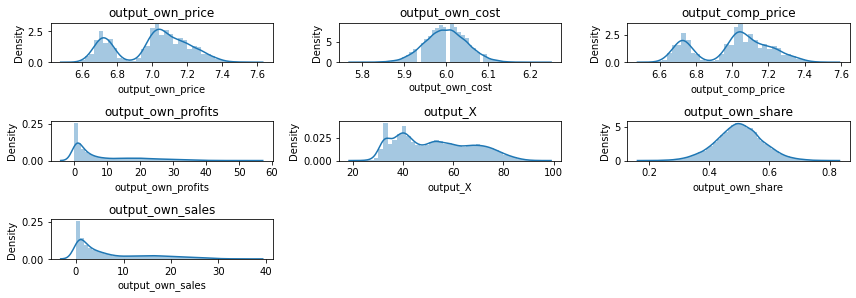

In [11]:
k=1
plt.figure(figsize=(12,12))

for i in df.select_dtypes("float64"):
    plt.subplot(9,3,k)
    sns.distplot(df[i])
    plt.title(i)
    k+=1
    plt.tight_layout()
    
    
import warnings
warnings.filterwarnings("ignore")

In [12]:
df_outlier_remove=df.copy()

In [13]:
outlier_list=["output_own_price","output_own_price","output_own_cost","output_comp_price","output_own_profits","output_X","output_own_share","output_own_sales"]


for i in df_outlier_remove.loc[:,outlier_list]:
    Q1 = df_outlier_remove[i].quantile(0.10)
    Q3 = df_outlier_remove[i].quantile(0.90)
    IQR = Q3-Q1
    up = Q3 + 1.5*IQR
    low = Q1 - 1.5*IQR

    if df_outlier_remove[(df_outlier_remove[i] > up) | (df_outlier_remove[i] < low)].any(axis=None):
        print(i,"-> Yes! There are Outliers.")
    else:
        print(i, "-> No Outliers")

output_own_price -> No Outliers
output_own_price -> No Outliers
output_own_cost -> No Outliers
output_comp_price -> No Outliers
output_own_profits -> No Outliers
output_X -> No Outliers
output_own_share -> No Outliers
output_own_sales -> No Outliers


In [14]:
# Time Series Analysis

In [15]:
from datetime import datetime

In [16]:
df["output_date"] = pd.to_datetime(df.output_date)
df["day"]=df["output_date"].dt.day

In [17]:
df.head()

,mkt_id,output_date,output_own_price,output_own_cost,output_comp_price,output_own_profits,output_X,output_own_share,output_own_sales,day
0,44,2019-01-01,7.05,5.90,7.11,15.06500,42.80,0.515267,13.10,1
1,44,2019-01-02,7.05,6.05,7.11,24.31000,36.14,0.557082,24.31,2
2,44,2019-01-03,7.05,5.98,7.28,30.78391,34.34,0.579922,28.77,3
3,44,2019-01-04,7.05,5.98,7.28,20.16950,36.32,0.542767,18.85,4
4,44,2019-01-05,6.79,6.07,6.68,1.23120,44.06,0.494757,1.71,5


In [18]:
df.dtypes

mkt_id                         int64
output_date           datetime64[ns]
output_own_price             float64
output_own_cost              float64
output_comp_price            float64
output_own_profits           float64
output_X                     float64
output_own_share             float64
output_own_sales             float64
day                            int64
dtype: object

In [19]:
#df = df.set_index("output_date")
#df

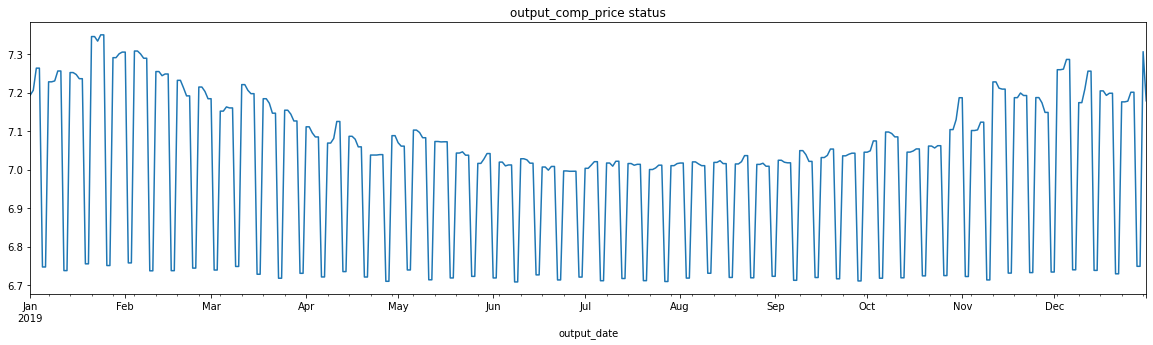

In [20]:
custgroup=df.groupby('output_date').mean()
plt.figure(figsize=(20,5))
custgroup['output_comp_price'].plot(x=df.output_date)
plt.title("output_comp_price status")
plt.show()

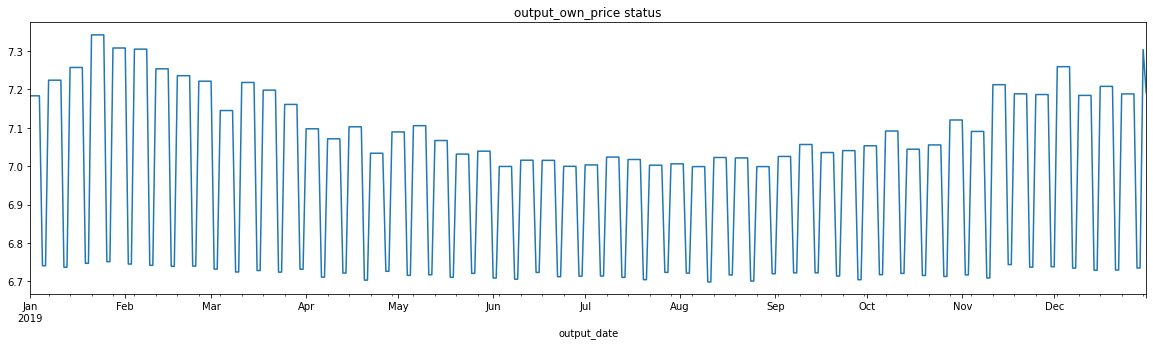

In [21]:
custgroup=df.groupby('output_date').mean()
plt.figure(figsize=(20,5))
custgroup['output_own_price'].plot(x=df.output_date)
plt.title("output_own_price status")
plt.show()

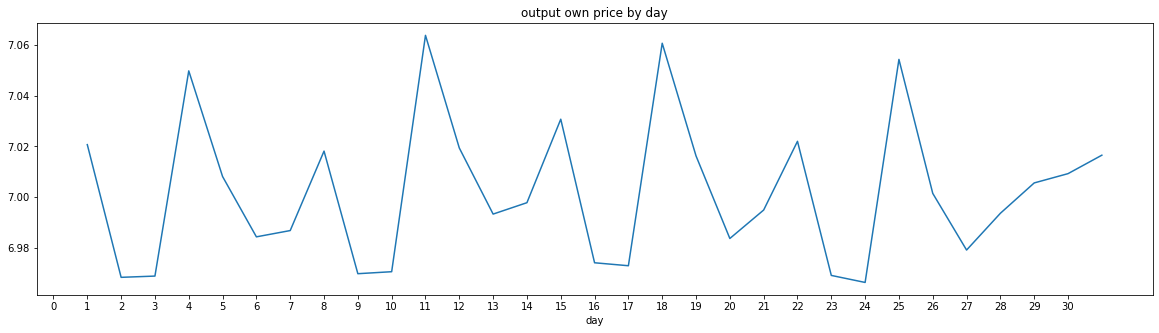

In [22]:
custgroup=df.groupby('day').mean()
fig,ax=plt.subplots(figsize=(20,5))
ax.xaxis.set(ticks=range(0,31))
custgroup['output_own_price'].plot(x=df.output_date)
plt.title("output own price by day")
plt.show()

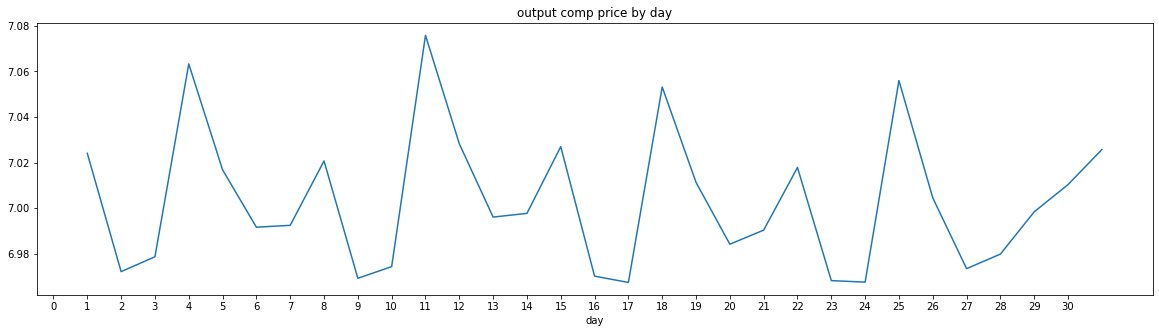

In [23]:
custgroup=df.groupby('day').mean()
fig,ax=plt.subplots(figsize=(20,5))
ax.xaxis.set(ticks=range(0,31))
custgroup['output_comp_price'].plot(x=df.output_date)
plt.title("output comp price by day")
plt.show()

In [24]:
df.drop("output_date",axis=1,inplace=True)
df.head(2)

,mkt_id,output_own_price,output_own_cost,output_comp_price,output_own_profits,output_X,output_own_share,output_own_sales,day
0,44,7.05,5.90,7.11,15.065,42.80,0.515267,13.10,1
1,44,7.05,6.05,7.11,24.310,36.14,0.557082,24.31,2


In [25]:
#plt.figure(figsize=(30,8))
#sns.countplot(df.mkt_id);

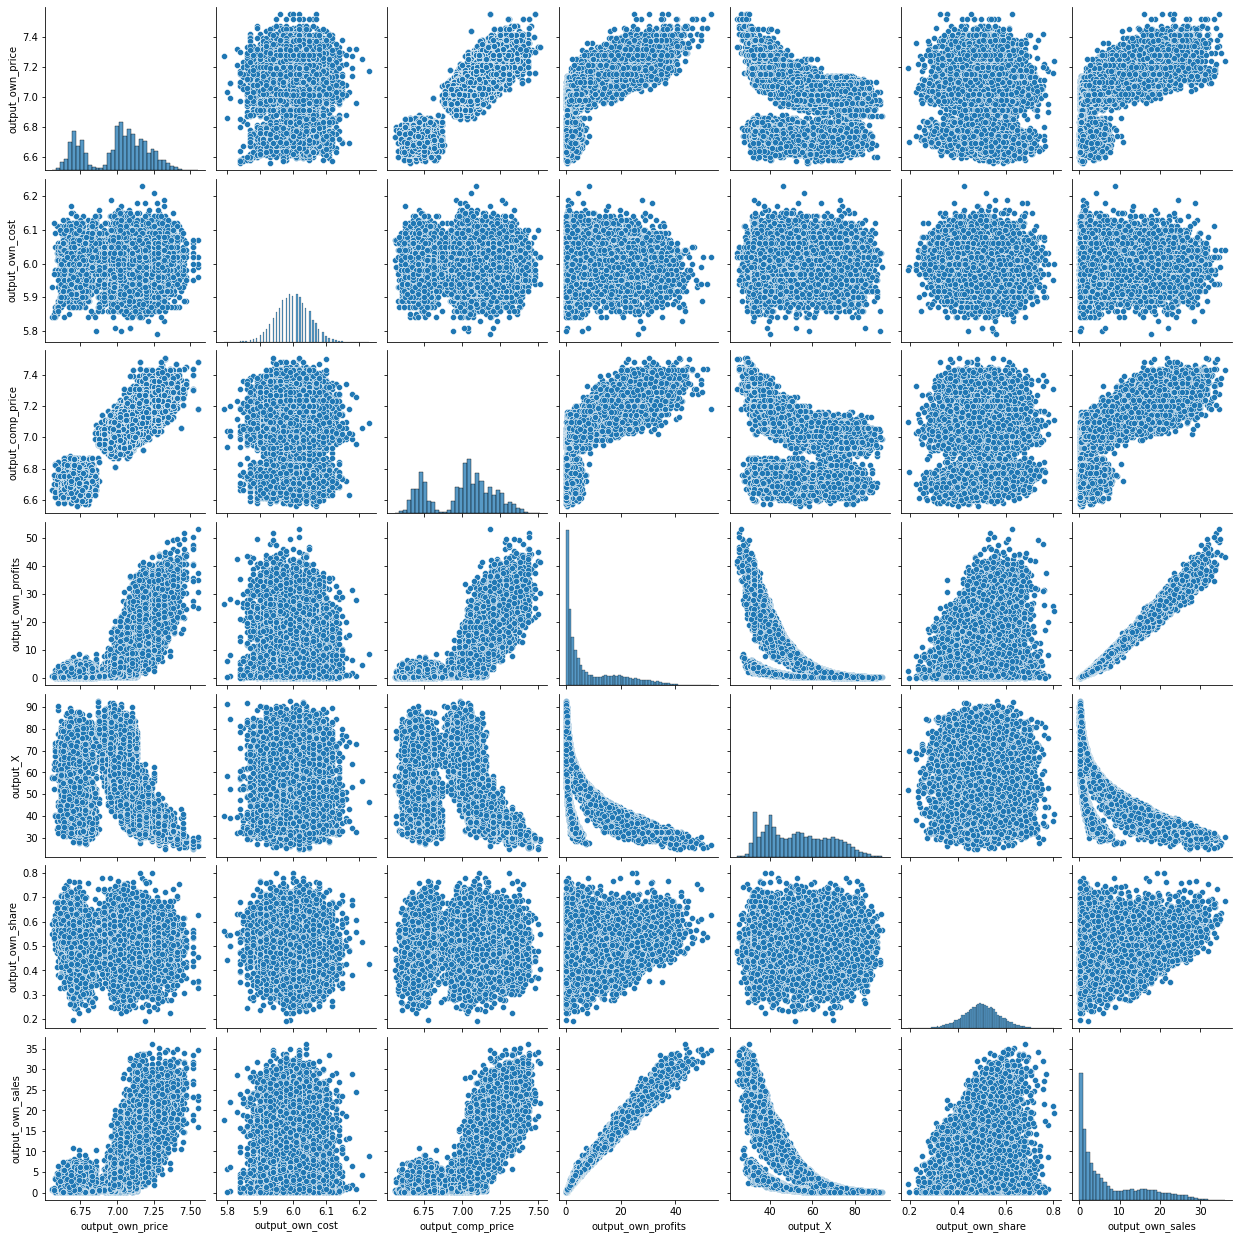

In [26]:
sns.pairplot(df.select_dtypes("float"));

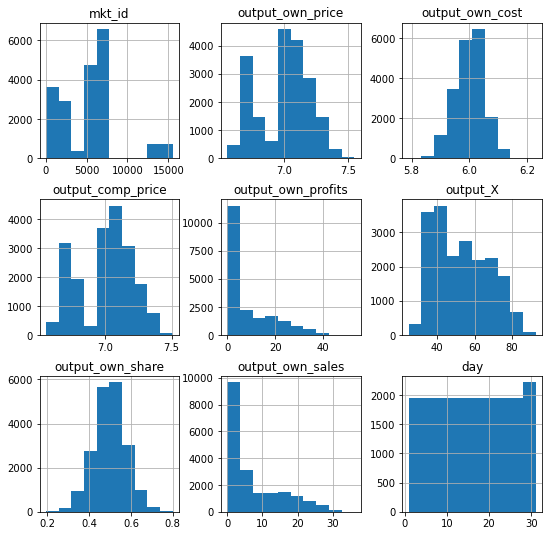

In [27]:
df.hist(figsize=(9,9));

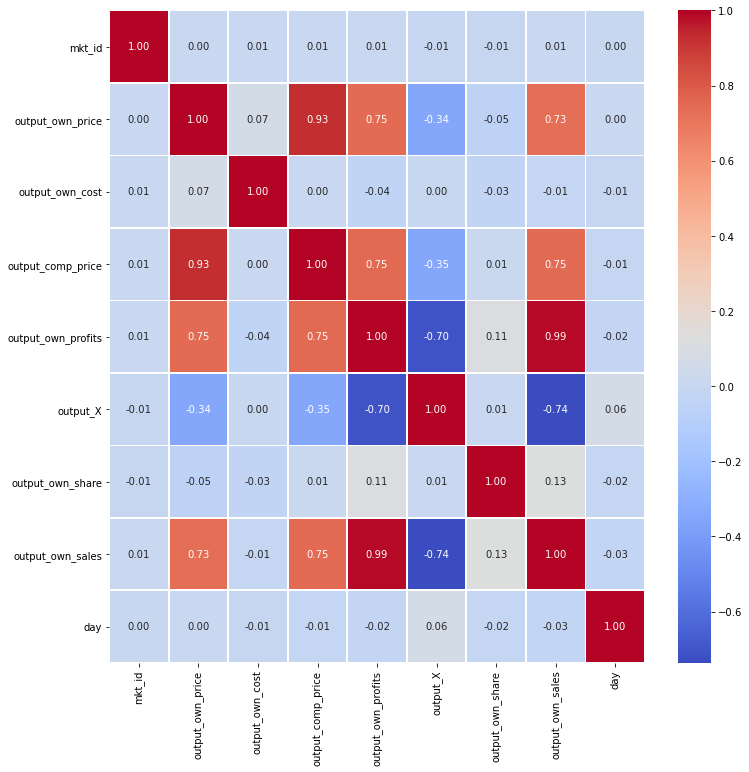

In [28]:
plt.figure(figsize=(12,12))
sns.heatmap(df.corr(),annot=True,linewidths=0.7,fmt=".2f",cmap="coolwarm")
plt.show()

In [29]:
# Modelling

In [30]:
from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV
from sklearn.metrics import mean_squared_error,r2_score

In [31]:
X=df.drop("output_own_price",axis=1)
y=df["output_own_price"] 

In [32]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)

In [33]:
import plotly.express as px
from sklearn.preprocessing import scale
from sklearn.preprocessing import StandardScaler
from sklearn import model_selection

In [34]:
#!pip install catboost
#!pip install lightgbm
#!pip install xgboost

In [35]:
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from lightgbm import LGBMRegressor

In [36]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor

In [37]:
ada=AdaBoostRegressor().fit(X_train,y_train)
dtc=DecisionTreeRegressor().fit(X_train,y_train)
rf=RandomForestRegressor().fit(X_train,y_train)
xgb=XGBRegressor().fit(X_train,y_train)
lgb=LGBMRegressor().fit(X_train,y_train)
catbost=CatBoostRegressor().fit(X_train,y_train)

Learning rate set to 0.061982
0:	learn: 0.1920230	total: 347ms	remaining: 5m 47s
1:	learn: 0.1815008	total: 353ms	remaining: 2m 56s
2:	learn: 0.1717241	total: 363ms	remaining: 2m
3:	learn: 0.1625254	total: 370ms	remaining: 1m 32s
4:	learn: 0.1540001	total: 378ms	remaining: 1m 15s
5:	learn: 0.1460100	total: 385ms	remaining: 1m 3s
6:	learn: 0.1385961	total: 393ms	remaining: 55.7s
7:	learn: 0.1317507	total: 400ms	remaining: 49.5s
8:	learn: 0.1253527	total: 407ms	remaining: 44.8s
9:	learn: 0.1194011	total: 414ms	remaining: 41s
10:	learn: 0.1138672	total: 422ms	remaining: 38s
11:	learn: 0.1087337	total: 431ms	remaining: 35.5s
12:	learn: 0.1040628	total: 439ms	remaining: 33.3s
13:	learn: 0.0998110	total: 446ms	remaining: 31.4s
14:	learn: 0.0958301	total: 453ms	remaining: 29.8s
15:	learn: 0.0921659	total: 461ms	remaining: 28.4s
16:	learn: 0.0888516	total: 469ms	remaining: 27.1s
17:	learn: 0.0856681	total: 476ms	remaining: 26s
18:	learn: 0.0828050	total: 484ms	remaining: 25s
19:	learn: 0.08013

162:	learn: 0.0466482	total: 1.66s	remaining: 8.53s
163:	learn: 0.0466186	total: 1.67s	remaining: 8.5s
164:	learn: 0.0465652	total: 1.67s	remaining: 8.47s
165:	learn: 0.0465268	total: 1.68s	remaining: 8.43s
166:	learn: 0.0464853	total: 1.68s	remaining: 8.4s
167:	learn: 0.0464588	total: 1.69s	remaining: 8.37s
168:	learn: 0.0464228	total: 1.7s	remaining: 8.34s
169:	learn: 0.0463738	total: 1.7s	remaining: 8.3s
170:	learn: 0.0463268	total: 1.71s	remaining: 8.27s
171:	learn: 0.0463102	total: 1.71s	remaining: 8.23s
172:	learn: 0.0462685	total: 1.72s	remaining: 8.2s
173:	learn: 0.0461839	total: 1.72s	remaining: 8.16s
174:	learn: 0.0461698	total: 1.72s	remaining: 8.13s
175:	learn: 0.0461500	total: 1.73s	remaining: 8.1s
176:	learn: 0.0461258	total: 1.73s	remaining: 8.06s
177:	learn: 0.0461123	total: 1.74s	remaining: 8.03s
178:	learn: 0.0460195	total: 1.74s	remaining: 8s
179:	learn: 0.0460016	total: 1.75s	remaining: 7.97s
180:	learn: 0.0459369	total: 1.75s	remaining: 7.93s
181:	learn: 0.0458846	

343:	learn: 0.0401411	total: 2.93s	remaining: 5.58s
344:	learn: 0.0401117	total: 2.95s	remaining: 5.61s
345:	learn: 0.0400805	total: 2.96s	remaining: 5.61s
346:	learn: 0.0400257	total: 2.98s	remaining: 5.6s
347:	learn: 0.0399825	total: 2.98s	remaining: 5.59s
348:	learn: 0.0399599	total: 2.99s	remaining: 5.58s
349:	learn: 0.0398974	total: 3s	remaining: 5.57s
350:	learn: 0.0398645	total: 3.01s	remaining: 5.56s
351:	learn: 0.0398568	total: 3.02s	remaining: 5.55s
352:	learn: 0.0398417	total: 3.02s	remaining: 5.54s
353:	learn: 0.0397798	total: 3.03s	remaining: 5.53s
354:	learn: 0.0397420	total: 3.04s	remaining: 5.52s
355:	learn: 0.0397255	total: 3.05s	remaining: 5.51s
356:	learn: 0.0396864	total: 3.05s	remaining: 5.5s
357:	learn: 0.0396659	total: 3.06s	remaining: 5.49s
358:	learn: 0.0395836	total: 3.07s	remaining: 5.47s
359:	learn: 0.0395756	total: 3.07s	remaining: 5.46s
360:	learn: 0.0395131	total: 3.08s	remaining: 5.45s
361:	learn: 0.0394594	total: 3.08s	remaining: 5.43s
362:	learn: 0.039

528:	learn: 0.0349527	total: 4.24s	remaining: 3.77s
529:	learn: 0.0349361	total: 4.24s	remaining: 3.76s
530:	learn: 0.0348989	total: 4.25s	remaining: 3.75s
531:	learn: 0.0348377	total: 4.26s	remaining: 3.75s
532:	learn: 0.0348200	total: 4.27s	remaining: 3.74s
533:	learn: 0.0347633	total: 4.28s	remaining: 3.74s
534:	learn: 0.0347522	total: 4.29s	remaining: 3.73s
535:	learn: 0.0347432	total: 4.3s	remaining: 3.73s
536:	learn: 0.0347370	total: 4.34s	remaining: 3.74s
537:	learn: 0.0347100	total: 4.35s	remaining: 3.74s
538:	learn: 0.0346960	total: 4.36s	remaining: 3.73s
539:	learn: 0.0346738	total: 4.37s	remaining: 3.72s
540:	learn: 0.0346665	total: 4.38s	remaining: 3.71s
541:	learn: 0.0346236	total: 4.38s	remaining: 3.7s
542:	learn: 0.0346136	total: 4.39s	remaining: 3.69s
543:	learn: 0.0345816	total: 4.4s	remaining: 3.69s
544:	learn: 0.0345582	total: 4.41s	remaining: 3.68s
545:	learn: 0.0345195	total: 4.42s	remaining: 3.67s
546:	learn: 0.0345070	total: 4.43s	remaining: 3.67s
547:	learn: 0.0

706:	learn: 0.0307931	total: 5.63s	remaining: 2.33s
707:	learn: 0.0307860	total: 5.65s	remaining: 2.33s
708:	learn: 0.0307337	total: 5.66s	remaining: 2.32s
709:	learn: 0.0307154	total: 5.67s	remaining: 2.31s
710:	learn: 0.0306790	total: 5.68s	remaining: 2.31s
711:	learn: 0.0306716	total: 5.69s	remaining: 2.3s
712:	learn: 0.0306476	total: 5.7s	remaining: 2.29s
713:	learn: 0.0306148	total: 5.71s	remaining: 2.29s
714:	learn: 0.0306096	total: 5.71s	remaining: 2.28s
715:	learn: 0.0305914	total: 5.72s	remaining: 2.27s
716:	learn: 0.0305558	total: 5.73s	remaining: 2.26s
717:	learn: 0.0305508	total: 5.73s	remaining: 2.25s
718:	learn: 0.0305414	total: 5.74s	remaining: 2.24s
719:	learn: 0.0304987	total: 5.75s	remaining: 2.23s
720:	learn: 0.0304723	total: 5.75s	remaining: 2.23s
721:	learn: 0.0304412	total: 5.76s	remaining: 2.22s
722:	learn: 0.0304281	total: 5.76s	remaining: 2.21s
723:	learn: 0.0304025	total: 5.77s	remaining: 2.2s
724:	learn: 0.0303815	total: 5.77s	remaining: 2.19s
725:	learn: 0.0

876:	learn: 0.0273691	total: 6.9s	remaining: 967ms
877:	learn: 0.0273538	total: 6.91s	remaining: 960ms
878:	learn: 0.0273484	total: 6.92s	remaining: 952ms
879:	learn: 0.0273381	total: 6.93s	remaining: 945ms
880:	learn: 0.0273180	total: 6.94s	remaining: 937ms
881:	learn: 0.0273033	total: 6.95s	remaining: 930ms
882:	learn: 0.0272851	total: 6.96s	remaining: 923ms
883:	learn: 0.0272782	total: 6.97s	remaining: 915ms
884:	learn: 0.0272386	total: 6.99s	remaining: 908ms
885:	learn: 0.0272126	total: 7s	remaining: 901ms
886:	learn: 0.0271885	total: 7.03s	remaining: 896ms
887:	learn: 0.0271695	total: 7.04s	remaining: 888ms
888:	learn: 0.0271499	total: 7.05s	remaining: 880ms
889:	learn: 0.0271386	total: 7.06s	remaining: 872ms
890:	learn: 0.0271265	total: 7.07s	remaining: 865ms
891:	learn: 0.0271121	total: 7.08s	remaining: 857ms
892:	learn: 0.0270757	total: 7.12s	remaining: 853ms
893:	learn: 0.0270697	total: 7.13s	remaining: 845ms
894:	learn: 0.0270585	total: 7.13s	remaining: 837ms
895:	learn: 0.02

In [38]:
models=[ada,dtc,rf,xgb,lgb,catbost]

def ML(y,models):
    accuary=models.score(X_train,y_train)
    return accuary

In [39]:
for i in models:
     print(i,"Algorithm succed rate :",ML("survived",i))

AdaBoostRegressor() Algorithm succed rate : 0.9227357490113505
DecisionTreeRegressor() Algorithm succed rate : 1.0
RandomForestRegressor() Algorithm succed rate : 0.9947550151230279
XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...) Algorithm succed rate : 0.9912956481870763
LGBMRegressor() Algorithm succed rate : 0.9723265412619274
<catboost.core.CatBoostRegr

In [40]:
df.head()

,mkt_id,output_own_price,output_own_cost,output_comp_price,output_own_profits,output_X,output_own_share,output_own_sales,day
0,44,7.05,5.90,7.11,15.06500,42.80,0.515267,13.10,1
1,44,7.05,6.05,7.11,24.31000,36.14,0.557082,24.31,2
2,44,7.05,5.98,7.28,30.78391,34.34,0.579922,28.77,3
3,44,7.05,5.98,7.28,20.16950,36.32,0.542767,18.85,4
4,44,6.79,6.07,6.68,1.23120,44.06,0.494757,1.71,5


In [42]:
# profits = total sales x (price - per-unit cost).
df['k']=df['output_own_price']-df['output_own_cost']
df['k']


0        1.15
1        1.00
2        1.07
3        1.07
4        0.72
         ... 
19705    1.32
19706    0.75
19707    0.78
19708    1.32
19709    1.23
Name: k, Length: 19710, dtype: float64

In [43]:
df.head()

,mkt_id,output_own_price,output_own_cost,output_comp_price,output_own_profits,output_X,output_own_share,output_own_sales,day,k
0,44,7.05,5.90,7.11,15.06500,42.80,0.515267,13.10,1,1.15
1,44,7.05,6.05,7.11,24.31000,36.14,0.557082,24.31,2,1.00
2,44,7.05,5.98,7.28,30.78391,34.34,0.579922,28.77,3,1.07
3,44,7.05,5.98,7.28,20.16950,36.32,0.542767,18.85,4,1.07
4,44,6.79,6.07,6.68,1.23120,44.06,0.494757,1.71,5,0.72


In [44]:
df['profits']= df['k']*df['output_own_sales']

In [45]:
df.head()

,mkt_id,output_own_price,output_own_cost,output_comp_price,output_own_profits,output_X,output_own_share,output_own_sales,day,k,profits
0,44,7.05,5.90,7.11,15.06500,42.80,0.515267,13.10,1,1.15,15.0650
1,44,7.05,6.05,7.11,24.31000,36.14,0.557082,24.31,2,1.00,24.3100
2,44,7.05,5.98,7.28,30.78391,34.34,0.579922,28.77,3,1.07,30.7839
3,44,7.05,5.98,7.28,20.16950,36.32,0.542767,18.85,4,1.07,20.1695
4,44,6.79,6.07,6.68,1.23120,44.06,0.494757,1.71,5,0.72,1.2312


In [47]:
data = df.drop('k', axis=1)

In [48]:
data.head()

,mkt_id,output_own_price,output_own_cost,output_comp_price,output_own_profits,output_X,output_own_share,output_own_sales,day,profits
0,44,7.05,5.90,7.11,15.06500,42.80,0.515267,13.10,1,15.0650
1,44,7.05,6.05,7.11,24.31000,36.14,0.557082,24.31,2,24.3100
2,44,7.05,5.98,7.28,30.78391,34.34,0.579922,28.77,3,30.7839
3,44,7.05,5.98,7.28,20.16950,36.32,0.542767,18.85,4,20.1695
4,44,6.79,6.07,6.68,1.23120,44.06,0.494757,1.71,5,1.2312


In [50]:
X=data.drop("output_own_price",axis=1)
y=data["output_own_price"] 

In [51]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)

ada=AdaBoostRegressor().fit(X_train,y_train)
dtc=DecisionTreeRegressor().fit(X_train,y_train)
rf=RandomForestRegressor().fit(X_train,y_train)
xgb=XGBRegressor().fit(X_train,y_train)
lgb=LGBMRegressor().fit(X_train,y_train)
catbost=CatBoostRegressor().fit(X_train,y_train)

Learning rate set to 0.061982
0:	learn: 0.1921027	total: 4.74ms	remaining: 4.73s
1:	learn: 0.1815157	total: 9.49ms	remaining: 4.73s
2:	learn: 0.1717712	total: 15.8ms	remaining: 5.25s
3:	learn: 0.1626362	total: 20.2ms	remaining: 5.03s
4:	learn: 0.1541457	total: 24.9ms	remaining: 4.96s
5:	learn: 0.1461492	total: 28.9ms	remaining: 4.78s
6:	learn: 0.1387544	total: 34.1ms	remaining: 4.83s
7:	learn: 0.1318062	total: 38.3ms	remaining: 4.75s
8:	learn: 0.1255239	total: 43.5ms	remaining: 4.79s
9:	learn: 0.1196005	total: 47.9ms	remaining: 4.74s
10:	learn: 0.1140438	total: 52.1ms	remaining: 4.68s
11:	learn: 0.1089590	total: 56.4ms	remaining: 4.65s
12:	learn: 0.1042877	total: 61.4ms	remaining: 4.66s
13:	learn: 0.1000307	total: 65.6ms	remaining: 4.62s
14:	learn: 0.0960480	total: 69.9ms	remaining: 4.59s
15:	learn: 0.0923802	total: 76.1ms	remaining: 4.68s
16:	learn: 0.0889643	total: 81.6ms	remaining: 4.71s
17:	learn: 0.0857959	total: 85.6ms	remaining: 4.67s
18:	learn: 0.0829024	total: 91.3ms	remaining

189:	learn: 0.0449495	total: 888ms	remaining: 3.78s
190:	learn: 0.0449382	total: 894ms	remaining: 3.79s
191:	learn: 0.0449081	total: 901ms	remaining: 3.79s
192:	learn: 0.0448822	total: 905ms	remaining: 3.79s
193:	learn: 0.0448110	total: 911ms	remaining: 3.79s
194:	learn: 0.0447588	total: 921ms	remaining: 3.8s
195:	learn: 0.0447320	total: 926ms	remaining: 3.8s
196:	learn: 0.0447006	total: 931ms	remaining: 3.79s
197:	learn: 0.0446382	total: 936ms	remaining: 3.79s
198:	learn: 0.0445607	total: 942ms	remaining: 3.79s
199:	learn: 0.0445272	total: 948ms	remaining: 3.79s
200:	learn: 0.0444811	total: 955ms	remaining: 3.8s
201:	learn: 0.0444334	total: 961ms	remaining: 3.8s
202:	learn: 0.0443982	total: 966ms	remaining: 3.79s
203:	learn: 0.0443550	total: 972ms	remaining: 3.79s
204:	learn: 0.0442815	total: 978ms	remaining: 3.79s
205:	learn: 0.0442630	total: 982ms	remaining: 3.79s
206:	learn: 0.0442445	total: 989ms	remaining: 3.79s
207:	learn: 0.0441982	total: 995ms	remaining: 3.79s
208:	learn: 0.04

373:	learn: 0.0389413	total: 1.77s	remaining: 2.96s
374:	learn: 0.0389308	total: 1.77s	remaining: 2.96s
375:	learn: 0.0388810	total: 1.78s	remaining: 2.95s
376:	learn: 0.0388514	total: 1.78s	remaining: 2.95s
377:	learn: 0.0388202	total: 1.79s	remaining: 2.94s
378:	learn: 0.0388001	total: 1.79s	remaining: 2.94s
379:	learn: 0.0387963	total: 1.8s	remaining: 2.93s
380:	learn: 0.0387874	total: 1.8s	remaining: 2.93s
381:	learn: 0.0387643	total: 1.8s	remaining: 2.92s
382:	learn: 0.0387147	total: 1.81s	remaining: 2.92s
383:	learn: 0.0386923	total: 1.81s	remaining: 2.91s
384:	learn: 0.0386766	total: 1.82s	remaining: 2.9s
385:	learn: 0.0386352	total: 1.82s	remaining: 2.9s
386:	learn: 0.0385906	total: 1.83s	remaining: 2.89s
387:	learn: 0.0385126	total: 1.83s	remaining: 2.89s
388:	learn: 0.0384647	total: 1.83s	remaining: 2.88s
389:	learn: 0.0384269	total: 1.84s	remaining: 2.88s
390:	learn: 0.0383792	total: 1.84s	remaining: 2.87s
391:	learn: 0.0383439	total: 1.85s	remaining: 2.87s
392:	learn: 0.038

535:	learn: 0.0344902	total: 2.47s	remaining: 2.14s
536:	learn: 0.0344745	total: 2.48s	remaining: 2.14s
537:	learn: 0.0344281	total: 2.48s	remaining: 2.13s
538:	learn: 0.0344210	total: 2.49s	remaining: 2.13s
539:	learn: 0.0343704	total: 2.49s	remaining: 2.12s
540:	learn: 0.0343434	total: 2.5s	remaining: 2.12s
541:	learn: 0.0343328	total: 2.5s	remaining: 2.11s
542:	learn: 0.0342853	total: 2.5s	remaining: 2.11s
543:	learn: 0.0342614	total: 2.51s	remaining: 2.1s
544:	learn: 0.0342212	total: 2.51s	remaining: 2.1s
545:	learn: 0.0341896	total: 2.52s	remaining: 2.09s
546:	learn: 0.0341660	total: 2.52s	remaining: 2.09s
547:	learn: 0.0341254	total: 2.53s	remaining: 2.08s
548:	learn: 0.0340996	total: 2.53s	remaining: 2.08s
549:	learn: 0.0340896	total: 2.53s	remaining: 2.07s
550:	learn: 0.0340682	total: 2.54s	remaining: 2.07s
551:	learn: 0.0340576	total: 2.54s	remaining: 2.06s
552:	learn: 0.0340275	total: 2.54s	remaining: 2.06s
553:	learn: 0.0339983	total: 2.55s	remaining: 2.05s
554:	learn: 0.033

702:	learn: 0.0306779	total: 3.18s	remaining: 1.34s
703:	learn: 0.0306651	total: 3.19s	remaining: 1.34s
704:	learn: 0.0306602	total: 3.19s	remaining: 1.34s
705:	learn: 0.0306318	total: 3.2s	remaining: 1.33s
706:	learn: 0.0306109	total: 3.2s	remaining: 1.33s
707:	learn: 0.0305697	total: 3.21s	remaining: 1.32s
708:	learn: 0.0305330	total: 3.21s	remaining: 1.32s
709:	learn: 0.0305214	total: 3.22s	remaining: 1.31s
710:	learn: 0.0305122	total: 3.22s	remaining: 1.31s
711:	learn: 0.0305020	total: 3.23s	remaining: 1.3s
712:	learn: 0.0304775	total: 3.23s	remaining: 1.3s
713:	learn: 0.0304560	total: 3.24s	remaining: 1.3s
714:	learn: 0.0304054	total: 3.24s	remaining: 1.29s
715:	learn: 0.0303927	total: 3.24s	remaining: 1.29s
716:	learn: 0.0303834	total: 3.25s	remaining: 1.28s
717:	learn: 0.0303725	total: 3.25s	remaining: 1.28s
718:	learn: 0.0303640	total: 3.26s	remaining: 1.27s
719:	learn: 0.0303465	total: 3.26s	remaining: 1.27s
720:	learn: 0.0303430	total: 3.27s	remaining: 1.26s
721:	learn: 0.030

899:	learn: 0.0266272	total: 4.07s	remaining: 452ms
900:	learn: 0.0265956	total: 4.07s	remaining: 448ms
901:	learn: 0.0265885	total: 4.08s	remaining: 443ms
902:	learn: 0.0265690	total: 4.08s	remaining: 439ms
903:	learn: 0.0265641	total: 4.09s	remaining: 434ms
904:	learn: 0.0265367	total: 4.09s	remaining: 430ms
905:	learn: 0.0265109	total: 4.1s	remaining: 425ms
906:	learn: 0.0264897	total: 4.1s	remaining: 421ms
907:	learn: 0.0264748	total: 4.11s	remaining: 416ms
908:	learn: 0.0264590	total: 4.11s	remaining: 412ms
909:	learn: 0.0264443	total: 4.12s	remaining: 407ms
910:	learn: 0.0264289	total: 4.13s	remaining: 403ms
911:	learn: 0.0264067	total: 4.13s	remaining: 399ms
912:	learn: 0.0263911	total: 4.14s	remaining: 395ms
913:	learn: 0.0263623	total: 4.15s	remaining: 390ms
914:	learn: 0.0263324	total: 4.15s	remaining: 386ms
915:	learn: 0.0263091	total: 4.16s	remaining: 381ms
916:	learn: 0.0263001	total: 4.16s	remaining: 377ms
917:	learn: 0.0262820	total: 4.17s	remaining: 372ms
918:	learn: 0.

In [52]:
models=[ada,dtc,rf,xgb,lgb,catbost]

def ML(y,models):
    accuary=models.score(X_train,y_train)
    return accuary

In [53]:
for i in models:
     print(i,"Algorithm succed rate :",ML("survived",i))

AdaBoostRegressor() Algorithm succed rate : 0.9226422878858226
DecisionTreeRegressor() Algorithm succed rate : 1.0
RandomForestRegressor() Algorithm succed rate : 0.994798016090555
XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...) Algorithm succed rate : 0.9912956481870763
LGBMRegressor() Algorithm succed rate : 0.9720369044512218
<catboost.core.CatBoostRegre

In [61]:
#Prediction Predicting the Results
y_pred = xgb.predict(X_test)

In [62]:
y_pred

array([7.0384054, 7.069809 , 6.69045  , ..., 6.7830834, 7.0419955,
       6.8057866], dtype=float32)

In [63]:
predictions = pd.DataFrame(y_pred)

In [64]:
predictions.to_csv('predict_csv')

In [60]:
#Prediction Predicting the Results
y_pred = dtc.predict(X_test)
y_pred

array([7.01, 7.11, 6.67, ..., 6.74, 7.08, 6.84])